In [ ]:
#Load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing:

In [ ]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.shape

(3999, 12)

In [ ]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [ ]:
#check the missing values
print(data.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [ ]:
#handling the missing values
data = data.dropna()  # Dropping rows with missing values for simplicity

In [ ]:
#detection of the outliers by using z-score
from scipy import stats


In [ ]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

In [ ]:
z_scores

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.735125,0.451141,0.186299,0.769578,0.098242,0.062767,0.702786,1.104065,0.328603,0.362168,1.395454,0.766919
1,1.734263,0.539457,0.186299,0.769578,0.098242,0.062767,0.701088,0.999926,0.328603,0.362168,1.379957,0.766919
2,1.733402,0.320031,0.186299,0.769578,0.098242,0.062767,0.539253,0.791649,0.328603,0.362168,1.411920,0.766919
3,1.732540,0.583799,0.186299,0.769578,0.098242,0.062767,0.689286,1.104065,0.328603,0.362168,1.372208,0.766919
4,1.731679,0.239678,0.186299,1.409471,0.098242,0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,0.547079,0.186299,0.769578,0.098242,0.062767,0.356960,0.791649,0.185750,0.098503,1.315120,1.303918
3995,1.725958,0.091465,0.186299,0.769578,0.098242,0.062767,0.669367,0.687511,0.328603,0.362168,1.318994,1.303918
3996,1.726820,0.000043,0.186299,0.683121,0.098242,0.062767,0.343804,0.375096,0.328603,0.362168,1.315604,1.303918
3997,1.727682,0.185607,0.186299,0.769578,0.098242,0.062767,0.689286,1.104065,0.028531,0.098503,1.316088,0.766919


In [ ]:
# Feature Scaling
Scaler = StandardScaler()
Scaled_features = Scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [ ]:
# Update the DataFrame with scaled features
data_df_scaled = pd.DataFrame(Scaled_features, columns=data.select_dtypes(include=[np.number]).columns)

In [ ]:
data_df_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.707275,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,1.708139,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,1.709004,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,1.709869,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


# Correlation Matrix

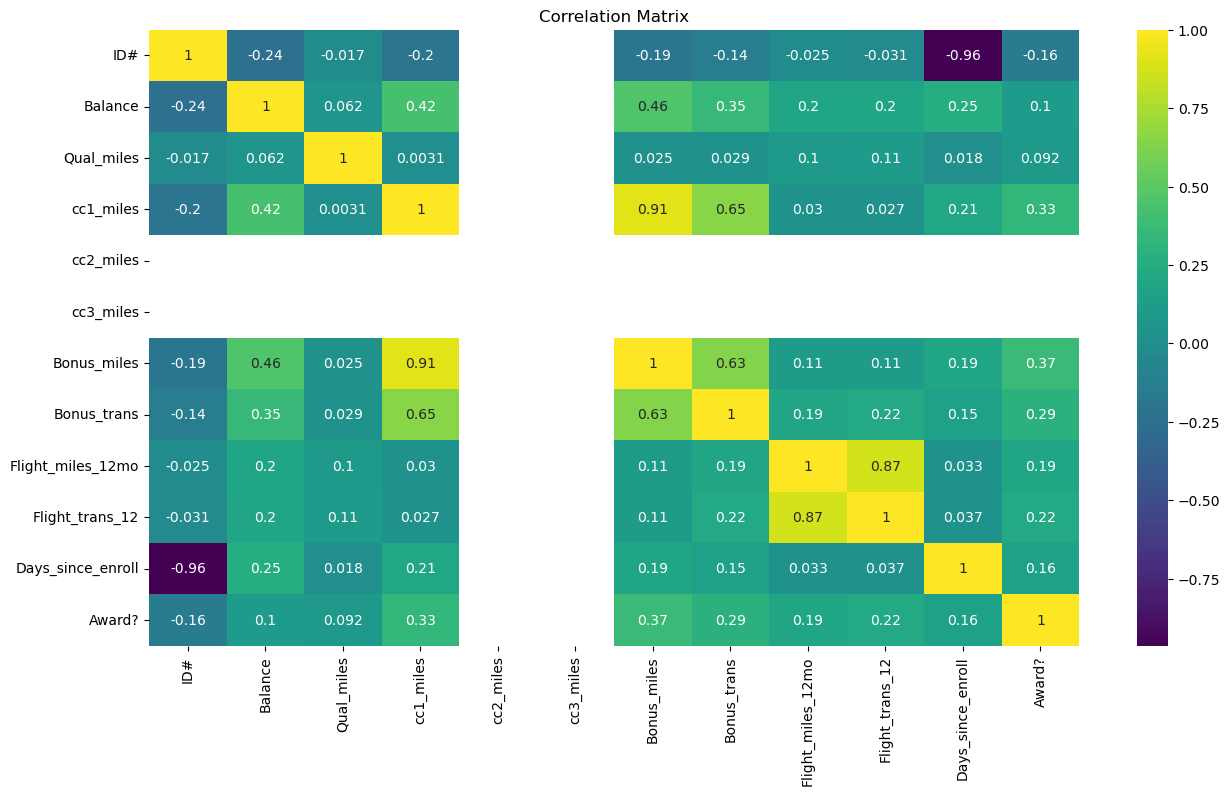

In [ ]:
#plotting the correlation matrix on the scaled features
plt.figure(figsize=(15, 8))
sns.heatmap(data_df_scaled.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

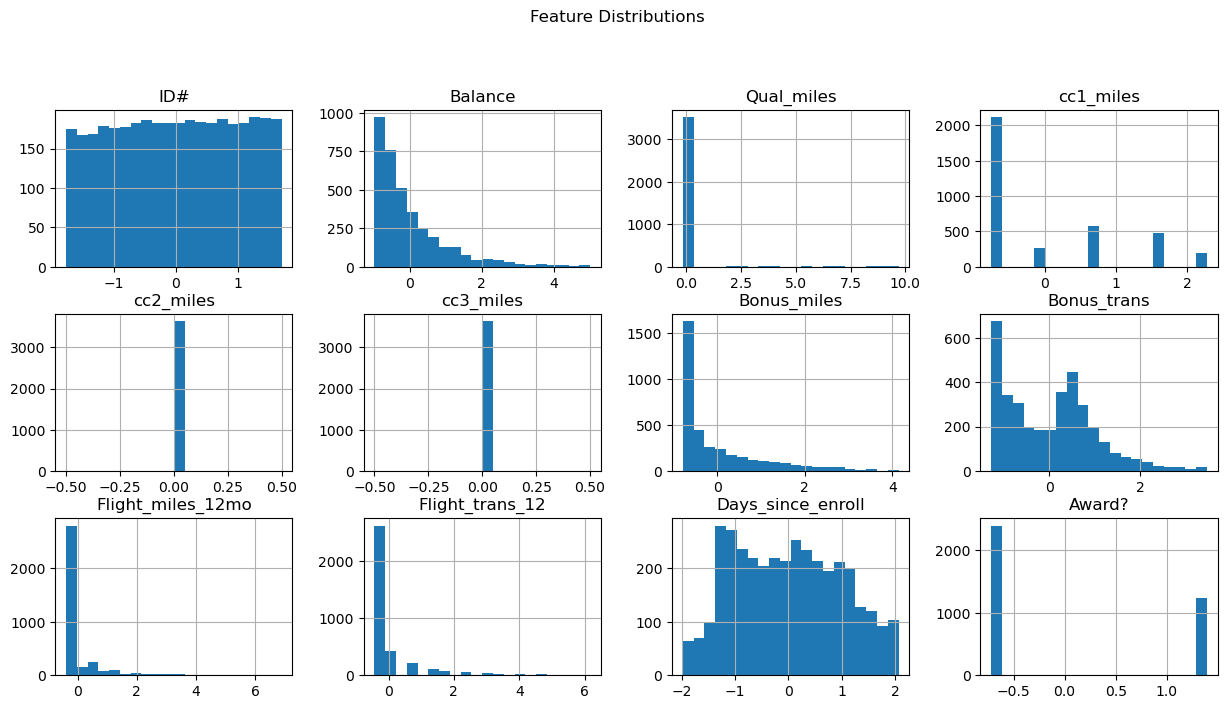

In [ ]:
# Visualizing feature distributions
data_df_scaled.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Feature Distributions')
plt.show()

## Implementing Clustering Algorithms:

In [ ]:
#Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [ ]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization
Scaler = StandardScaler() # scaler is an object name of StandardScalar class
scaled_df = Scaler.fit_transform(data_df_scaled) # fit_transform() is a method of StandardScalar class
scaled_df

array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.73802497,
        -0.77311789, -0.1863707 ],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.73802497,
        -0.77311789, -0.1863707 ],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.73802497,
        -0.77311789, -0.1863707 ],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.73802497,
        -0.77311789, -0.4365651 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ..., -0.73802497,
        -0.77311789,  5.81829482],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.73802497,
        -0.77311789, -0.1863707 ]])

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [ ]:
# Inertia measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
# and summing these squares across one cluster.
# A good model is one with low inertia AND a low number of clusters (K).

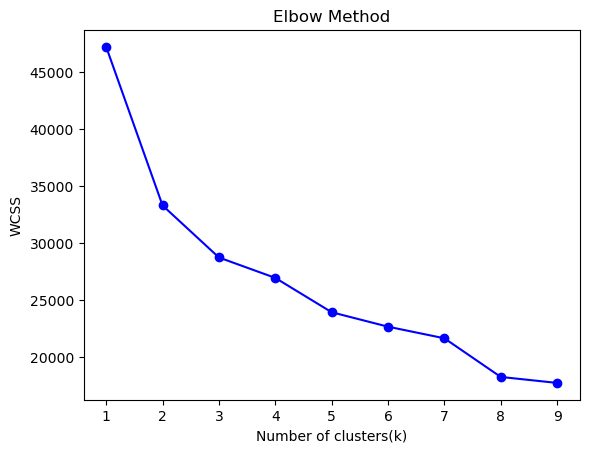

In [ ]:
# To plot the elbow method graph, we need to compute the WCSS (Within Cluster Sum of Squares)
# Let us say max. no. of clusters could be 10.
# As we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no. of clusters

wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.

# In WCSS list we will append all distances i.e if cluster is 10 what is the value,
# if 9 what is value and so on upto 1.

plt.plot(range(1, 10),wcss,'bo-',label="wcss")
plt.title('Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS')
plt.show()

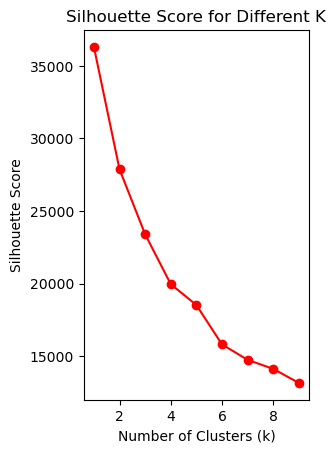

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(1, 10), wcss, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [ ]:
# Best K-Means clustering based on Silhouette Score
best_k = wcss.index(max(wcss)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_df)
kmeans_labels = kmeans.labels_

In [ ]:
kmeans_labels

array([0, 0, 0, ..., 0, 0, 0])

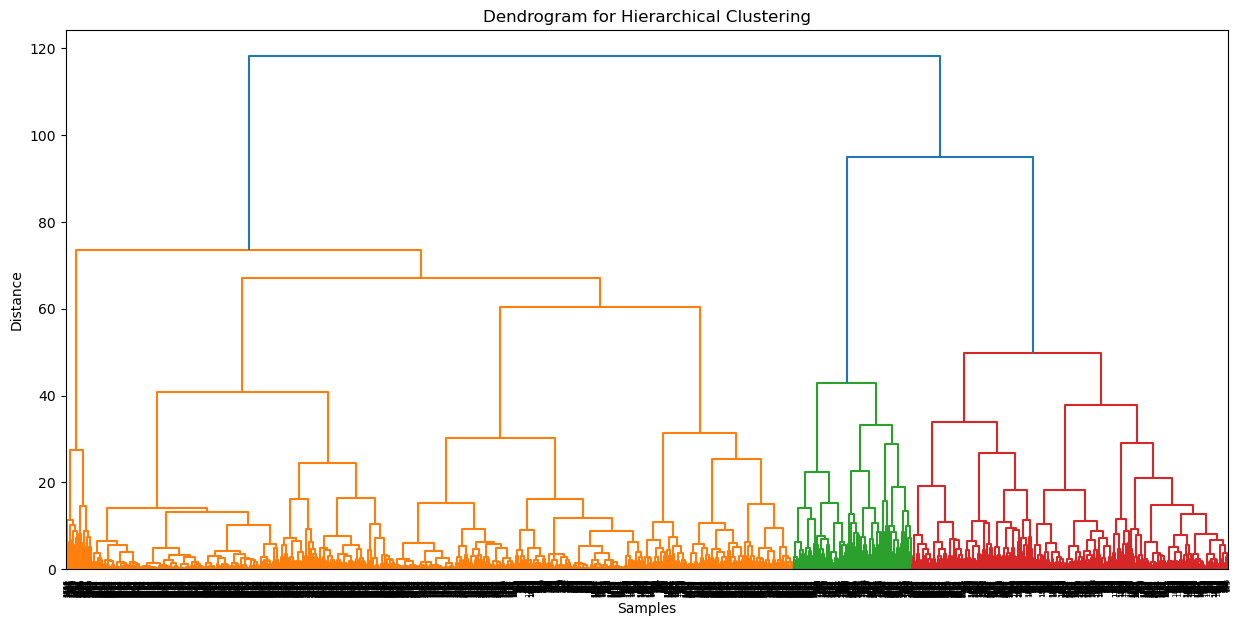

In [ ]:
# Hierarchical Clustering
Z = linkage(scaled_df, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cluster Analysis and Interpretation:

In [ ]:
# Assign clusters
Hierarchical_labels = fcluster(Z, t=best_k, criterion='maxclust')

In [ ]:
# DBSCAN Clustering
DBSCAN = DBSCAN(eps=0.5, min_samples=5)
DBSCAN_labels = DBSCAN.fit_predict(scaled_df)

In [ ]:
# Evaluate DBSCAN with silhouette score
DBSCAN_silhouette = silhouette_score(scaled_df, DBSCAN_labels)
print(f'DBSCAN Silhouette Score: {DBSCAN_silhouette:.4f}')

DBSCAN Silhouette Score: -0.3995


# Visualization:

In [ ]:
# Add cluster labels to the dataset

data_df_scaled['KMeans_Cluster'] = kmeans_labels
data_df_scaled['Hierarchical_Cluster'] = Hierarchical_labels
data_df_scaled['DBSCAN_Cluster'] = DBSCAN_labels

In [ ]:
# Analyzing clusters
print("K-Means Cluster Analysis")
print(data_df_scaled.groupby('KMeans_Cluster').mean())

K-Means Cluster Analysis
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.235728 -0.359366   -0.040508  -0.591861        0.0   
1              -0.432782  0.659773    0.074370   1.086620        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0    -0.552127    -0.480855          -0.141099   
1                     0.0     1.013671     0.882820           0.259048   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                     -0.144868          -0.243845 -0.304042   
1                      0.265968           0.447684  0.558203   

                Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                        
0                     

In [ ]:
print("\nHierarchical Cluster Analysis")
print(data_df_scaled.groupby('Hierarchical_Cluster').mean())


Hierarchical Cluster Analysis
                           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                         
1                     0.261997 -0.336749    0.041959  -0.496521        0.0   
2                    -0.438333  0.563398   -0.070199   0.830704        0.0   

                      cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                           
1                           0.0    -0.482617    -0.412047          -0.309911   
2                           0.0     0.807442     0.689375           0.518495   

                      Flight_trans_12  Days_since_enroll    Award?  \
Hierarchical_Cluster                                                 
1                           -0.314137          -0.267939 -0.227585   
2                            0.525567           0.448276  0.380761   

                      KMeans_Cluster  DBSCAN_Cluster  

In [ ]:
print("\nDBSCAN Cluster Analysis")
print(data_df_scaled.groupby('DBSCAN_Cluster').mean())


DBSCAN Cluster Analysis
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                         
-1             -0.148947  0.453938    0.146908   0.388999        0.0   
 0              0.287999 -0.611324   -0.158869  -0.755664        0.0   
 1             -1.574482  0.736971   -0.158869  -0.755664        0.0   
 2             -0.219212 -0.571228   -0.158869  -0.755664        0.0   
 3             -1.496608 -0.776332   -0.158869   0.002087        0.0   
 4             -1.513330  0.435742   -0.158869   0.759839        0.0   
 5             -0.213342 -0.598777   -0.158869   0.759839        0.0   
 6              0.004412  0.196533   -0.158869   0.759839        0.0   
 7             -0.846779 -0.363397   -0.158869   0.002087        0.0   
 8             -1.036395  0.240128   -0.158869   1.517591        0.0   
 9             -0.906359  0.600927   -0.158869   0.002087        0.0   
 10            -0.975914 -0.482953   -0

# K-Means Clusters

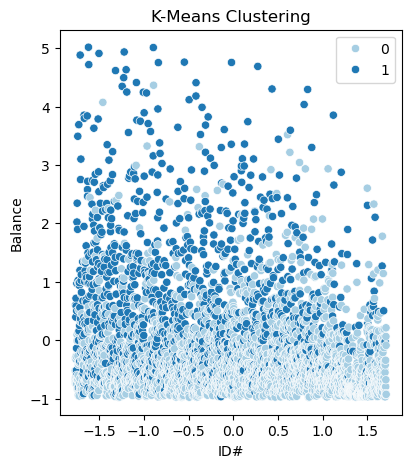

In [ ]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=kmeans_labels, palette='Paired')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clusters

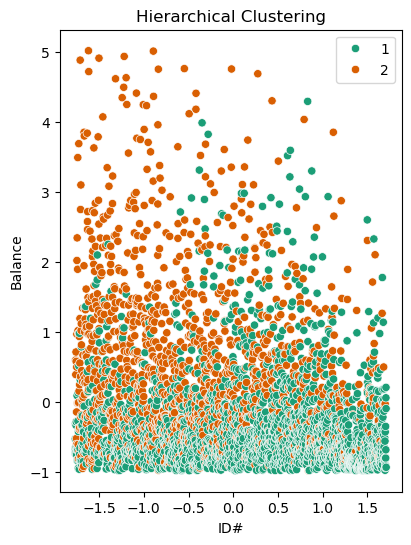

In [ ]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=Hierarchical_labels, palette='Dark2')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Clusters

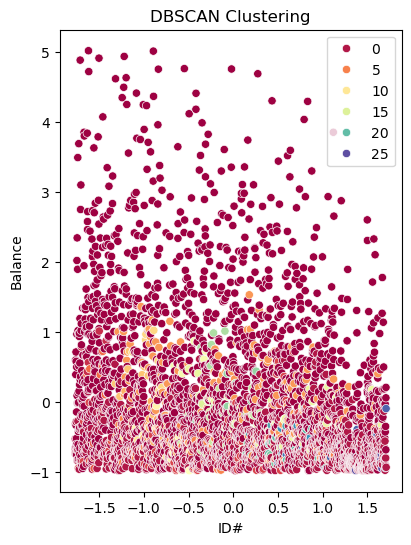

In [ ]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=DBSCAN_labels, palette='Spectral')
plt.title('DBSCAN Clustering')
plt.show()

# Evaluation and Performance Metrics:

In [ ]:
# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(data_df_scaled.iloc[:, :-3], kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette*100}')

K-Means Silhouette Score: 28.713491619912055


In [ ]:
# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(data_df_scaled.iloc[:, :-3], Hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette*100}')

Hierarchical Clustering Silhouette Score: 24.909012263212393
